### House Price Predicition Using Linear Regression algorithm. 

Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Detail of DataSet 

In this example we'll be using the Boston Housing dataset. There are 506 rows in the dataset. The target variable is median home price. There are 13 predictor variables including average number of rooms per dwelling, crime rate by town, etc. More information about this dataset can be found at https://www.kaggle.com/c/boston-housing



This data frame contains the following columns:

**crim**
per capita crime rate by town.

**zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**
proportion of non-retail business acres per town.

**chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**
nitrogen oxides concentration (parts per 10 million).

**rm**
average number of rooms per dwelling.

**age**
proportion of owner-occupied units built prior to 1940.

**dis**
weighted mean of distances to five Boston employment centres.

**rad**
index of accessibility to radial highways.

**tax**
full-value property-tax rate per $10,000.

**ptratio**
pupil-teacher ratio by town.

**black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**
lower status of the population (percent).

**medv**
median value of owner-occupied homes in $1000s.

In [2]:
from sklearn.datasets import load_boston 

In [3]:
columnss = ['Crime Rate','Residential Proportion','non-retail business acres/Town','Charles River',
            'NO2 concentration','Average Rooms/Dwelling.','Prior Built Units Proportion','Distance to Employment Centres',
            'Radial Highways Distance','ValueProperty/tax rate','Teacher/town','blacks/town','Lower Status Percent']

In [4]:
boston = load_boston()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
df = pd.DataFrame(boston.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
df = pd.DataFrame(boston.data ,columns = columnss)
df

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
df.values[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [9]:
df.values[1:3:1]

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [10]:
df['median home price'] = boston.target

In [11]:
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#df.to_csv('Boston.csv', index=False) 

### Creating Independent and Dependent Variables

In [13]:
X = df.drop(['median home price'], axis=1)
Y = df[['median home price']]
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


### Normalization

In [14]:
# scale the features
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)


In [15]:
X = pd.DataFrame(x_scaled_minmax, columns = columnss)
X.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### Train Test Splitting

<img src='train_test_split1.png' width=80%, height=80% >

In [16]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)

In [17]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


### Training Model, Predicting & Testing

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(xtrain, ytrain)  # model training 

LinearRegression()

## Physically analysis actual values and predicted values

In [20]:
predict_test = model.predict(xtest)

In [21]:
xtest_c = xtest.copy()

In [22]:
xtest_c['predict_test']=predict_test

In [23]:
xtest_c['actual reasult']=ytest.copy()

In [24]:
xtest_c

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,predict_test,actual reasult
125,0.001829,0.00,0.923387,0.0,0.403292,0.464648,0.880536,0.078504,0.043478,0.001908,0.691489,0.970044,0.360927,23.212415,21.4
486,0.063903,0.00,0.646628,0.0,0.407407,0.489174,0.791967,0.219726,1.000000,0.914122,0.808511,0.989359,0.365618,19.492396,19.1
324,0.003763,0.00,0.253666,0.0,0.222222,0.546848,0.383110,0.326592,0.173913,0.190840,0.744681,1.000000,0.121137,25.134921,25.0
386,0.274109,0.00,0.646628,0.0,0.648148,0.209044,1.000000,0.030700,1.000000,0.914122,0.808511,1.000000,0.732616,6.270952,10.5
459,0.076372,0.00,0.646628,0.0,0.674897,0.482851,0.839341,0.144395,1.000000,0.914122,0.808511,1.000000,0.357892,18.185460,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.000498,0.00,0.147727,0.0,0.131687,0.541866,0.464470,0.331894,0.086957,0.114504,0.627660,1.000000,0.217715,25.100352,23.9
307,0.000483,0.33,0.063050,0.0,0.179012,0.630006,0.694130,0.186698,0.260870,0.066794,0.617021,1.000000,0.160044,33.434188,28.2
173,0.000961,0.00,0.131598,0.0,0.257202,0.547040,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711,29.213348,23.6
56,0.000160,0.85,0.010264,0.0,0.051440,0.540717,0.337796,0.732752,0.043478,0.240458,0.500000,1.000000,0.111479,24.720948,24.7


In [25]:
model.coef_

array([[-10.25416832,   5.05163648,   0.7465737 ,   0.73047106,
         -9.22588505,  21.03952249,  -0.4688927 , -17.04518353,
          8.45182117,  -8.73511563,  -9.26613212,   2.95271586,
        -16.64030396]])

In [26]:
model.intercept_

array([27.43583278])

In [27]:
xtest_c

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,predict_test,actual reasult
125,0.001829,0.00,0.923387,0.0,0.403292,0.464648,0.880536,0.078504,0.043478,0.001908,0.691489,0.970044,0.360927,23.212415,21.4
486,0.063903,0.00,0.646628,0.0,0.407407,0.489174,0.791967,0.219726,1.000000,0.914122,0.808511,0.989359,0.365618,19.492396,19.1
324,0.003763,0.00,0.253666,0.0,0.222222,0.546848,0.383110,0.326592,0.173913,0.190840,0.744681,1.000000,0.121137,25.134921,25.0
386,0.274109,0.00,0.646628,0.0,0.648148,0.209044,1.000000,0.030700,1.000000,0.914122,0.808511,1.000000,0.732616,6.270952,10.5
459,0.076372,0.00,0.646628,0.0,0.674897,0.482851,0.839341,0.144395,1.000000,0.914122,0.808511,1.000000,0.357892,18.185460,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.000498,0.00,0.147727,0.0,0.131687,0.541866,0.464470,0.331894,0.086957,0.114504,0.627660,1.000000,0.217715,25.100352,23.9
307,0.000483,0.33,0.063050,0.0,0.179012,0.630006,0.694130,0.186698,0.260870,0.066794,0.617021,1.000000,0.160044,33.434188,28.2
173,0.000961,0.00,0.131598,0.0,0.257202,0.547040,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711,29.213348,23.6
56,0.000160,0.85,0.010264,0.0,0.051440,0.540717,0.337796,0.732752,0.043478,0.240458,0.500000,1.000000,0.111479,24.720948,24.7


In [28]:
x1=0.113027
x2=0.00
x3=0.646628
x4=0.0
x5=0.409465
x6=0.626940
x7=0.941298
x8=0.087170
x9=1.000000
x10=0.914122
x11=0.808511
x12=0.204272
x13=0.495585

In [29]:
model.coef_

array([[-10.25416832,   5.05163648,   0.7465737 ,   0.73047106,
         -9.22588505,  21.03952249,  -0.4688927 , -17.04518353,
          8.45182117,  -8.73511563,  -9.26613212,   2.95271586,
        -16.64030396]])

In [30]:
w1=-10.25416832
w2=5.05163648
w3=0.7465737
w4= 0.73047106
w5=-9.22588505
w6=21.03952249
w7= -0.4688927
w8=-17.04518353
w9=8.45182117
w10=-8.73511563
w11=-9.26613212
w12=2.95271586
w13= -16.64030396

In [31]:
mx =(x1*w1
          +x2*w2
          +x3*w3
          +x4*w4
          +x5*w5
          +x6*w6
          +x7*w7
          +x8*w8
          +x9*w9
          +x10*w10
          +x11*w11
          +x12*w12
          +x13*w13 )

In [32]:
mx

-7.859035435636248

### c is the y_intercept 

In [33]:
c = 27.43583278

Eqiation 
y = mx+c

In [34]:
output = mx+c
output

19.57679734436375

## prove that 

 ### y = mx + c
 
 c is interrpt only one time add while mx is calcalate
 
 m is wieght  so that                                   w1 w2 w3 w4 w5 w6 w7 w8 w9 w10 w11 w12 w13   coloum wieght
 
 x is the varible or coloum vlaue so that               x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12 x13   coloum item
 
 y is the predicted value according to this mx 
 
           y = mx + c
           
             = (-7.859035435636248)+(27.43583278 )
             
           y= 19.57679734436375 this value is present in y_test predict while in data frame the coloum name is " predected 
           
           value " present this value    

### **Checking r2 by sklearn metric**

R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mean_absolute_error(ytest,predict_test)

3.117569419480103

In [38]:
mean_squared_error(ytest,predict_test)

21.59720903501844

In [39]:
from sklearn.metrics import r2_score
test_r2=r2_score(ytest,predict_test)
test_r2

0.7133593313710358

In [40]:
train_r2=r2_score(ytrain,model.predict(xtrain))
train_r2
#ya oper wala he kam kea ha is ma different style say 

0.7435787589010061

In [41]:
print('R2 score for testing:',test_r2 )
print('R2 score for training:',train_r2 )

R2 score for testing: 0.7133593313710358
R2 score for training: 0.7435787589010061


#### loop understaning 

In [42]:
xtest.shape[-1]+1

14

In [43]:
xtest.shape

(152, 13)

In [44]:
xtrain.values

array([[0.00599967, 0.2       , 0.12866569, ..., 0.04255319, 0.98966161,
        0.21688742],
       [0.00808678, 0.        , 0.28152493, ..., 0.89361702, 0.98499672,
        0.26352097],
       [0.012639  , 0.        , 0.28152493, ..., 0.89361702, 0.90738313,
        0.575883  ],
       ...,
       [0.0904741 , 0.        , 0.64662757, ..., 0.80851064, 0.88824449,
        0.45281457],
       [0.00444757, 0.        , 0.34604106, ..., 0.61702128, 0.99573856,
        0.23813466],
       [0.00656098, 0.        , 0.78555718, ..., 0.91489362, 0.97190983,
        0.25910596]])

In [45]:
xtrain.values[1:3]

array([[0.00808678, 0.        , 0.28152493, 0.        , 0.31481481,
        0.41502203, 0.68589083, 0.2425138 , 0.13043478, 0.22900763,
        0.89361702, 0.98499672, 0.26352097],
       [0.012639  , 0.        , 0.28152493, 0.        , 0.31481481,
        0.41233953, 0.9392379 , 0.2822068 , 0.13043478, 0.22900763,
        0.89361702, 0.90738313, 0.575883  ]])

In [46]:
xtrain.values[:3]

array([[0.00599967, 0.2       , 0.12866569, 0.        , 0.53909465,
        0.69783483, 0.81256437, 0.08934336, 0.17391304, 0.14694656,
        0.04255319, 0.98966161, 0.21688742],
       [0.00808678, 0.        , 0.28152493, 0.        , 0.31481481,
        0.41502203, 0.68589083, 0.2425138 , 0.13043478, 0.22900763,
        0.89361702, 0.98499672, 0.26352097],
       [0.012639  , 0.        , 0.28152493, 0.        , 0.31481481,
        0.41233953, 0.9392379 , 0.2822068 , 0.13043478, 0.22900763,
        0.89361702, 0.90738313, 0.575883  ]])

In [47]:
xtrain.values[:,:1]

array([[5.99967090e-03],
       [8.08678173e-03],
       [1.26389965e-02],
       [2.50017197e-03],
       [3.22581080e-04],
       [7.18220593e-04],
       [9.98090590e-04],
       [9.83029313e-04],
       [4.12712707e-02],
       [8.55570447e-04],
       [4.28268533e-03],
       [3.74857199e-03],
       [1.12172794e-03],
       [8.61718595e-03],
       [1.70023833e-02],
       [5.24054882e-02],
       [3.49106911e-04],
       [3.16068764e-02],
       [3.33989436e-03],
       [5.42807296e-02],
       [2.71664972e-04],
       [3.96616248e-02],
       [8.52985302e-04],
       [9.70440783e-04],
       [1.24929920e-03],
       [4.96343257e-02],
       [8.41857941e-05],
       [2.42553997e-03],
       [8.95123159e-03],
       [1.84017333e-03],
       [1.59940420e-01],
       [4.61841693e-04],
       [1.62211976e-01],
       [2.61287303e-02],
       [6.40875316e-02],
       [6.50220052e-04],
       [5.46824386e-02],
       [3.23480261e-04],
       [9.02777434e-04],
       [8.25672688e-04],


In [48]:
r_2 = []
for i in range(1, (xtest.shape[-1])+1): # yaha par colum 14 ho gy jbka actul ma 13 he ho gy kue ka range ka functon ha 
    m=LinearRegression()                # lineraRagression ka ak object call kea gaya 
    m.fit(xtrain.values[:,:i],ytrain)   # xtrain ka data set ka  coloums  wise jo ha  ytrain par learning ho gy 
     
    predict_test=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,predict_test)) # is ma ytest or predict y_test ka r2_score find ho ga or oska bad wo 
    # r_2 jo list ha os ma add ho jaya ga or osko add karny ka laya append ka function use kea ha hum ny 

Text(0, 0.5, 'R_2 Score')

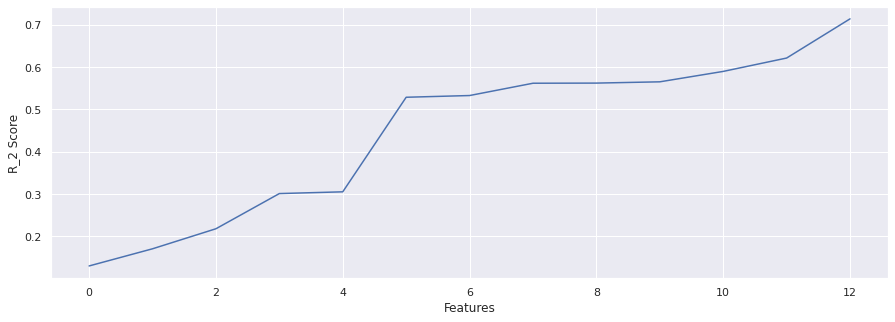

In [49]:
plt.figure(figsize=(15,5))
plt.plot(r_2);
plt.xlabel('Features')
plt.ylabel('R_2 Score')

### Adjusted R2 Calculation

<img src='https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2013/09/r-squared-adjusted.jpg' width=200, height=400 >

In [50]:
def adjR2 (xtest,ytest,r2):
    n = len(ytest)
    k = xtest.shape[-1]
    adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
    print('The adjusted R2 is:', adj_r2)

In [51]:
#import adj_helper as helper

#helper.adjR2(xtest,ytest,test_r2)

# is ma just xtest or ytest ka r2_score ko adjusted kea gaya 
#  71.00 say is ma 0.68 tak ly aaya hum
adjR2(xtest,ytest,test_r2)


The adjusted R2 is: 0.6863569495436697


**Ploting Residual Plots**

A residual is the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The ResidualsPlot Visualizer shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually well-suited for the data; otherwise, a non-linear model is more appropriate. The following example shows a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well.

Yellowbrick's ResidualsPlot Visualizer also displays a histogram of the error values along the right-hand side. In the example above, the error is normally distributed around zero, which also generally indicates a well-fitted model. If the histogram is not desired, it can be turned off with the hist=False flag.

In [52]:
#pip install yellowbrick==0.9.1

In [53]:
#!pip install scikit-learn

In [54]:
#pip install -U scikit-learn

In [55]:
#pip install -U yellowbrick

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

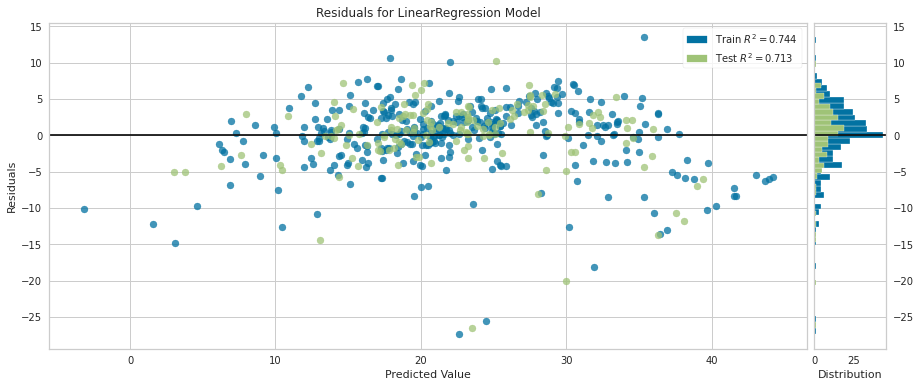

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(figsize=(15,6)) 
visualizer = ResidualsPlot(model,hist=True)   # residualsplot ka object bin raha han or (model yahny linearregression,
                                              # hist = true side pay distribution aaya gy 
visualizer.fit(xtrain.values, ytrain.values)  # is xtrain ko ytrian pay learn ya training karwa raha han 

visualizer.score(xtest.values, ytest.values)  # SCORE ma murad prediction ly raha han hum 
visualizer.poof()                             # ya graph ko show karny ka laya 

## 3 Recursive Feature Elimination
The sklearn package has several feature selection methods and details can be found at the [documentation][feature link] site. In this example we'll be using the recursive feature elimination method. This process starts with all variables and assigns weights to them. Those with small weights are first removed. The remaining variables are used to refit the model and the process repeats. 

We start by importing the packages that'll be used. 

[feature link]: http://scikit-learn.org/stable/modules/feature_selection.html

In [57]:
from sklearn.feature_selection import RFE

In [58]:
lrm = LinearRegression() # yaha pay linearRegression model ka ak object binaya jis ma LinearRegression model store ho ga 

In [59]:
# recursive feature elimination with cross validation, using r-squared as metric
rfe = RFE(estimator=lrm, step=3,n_features_to_select=5)

# explain this line   rfe.fit(X, np.hstack(Y.values))

In [60]:
X

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [61]:
Y

,median home price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [62]:
np.hstack(Y.values)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [63]:
rfe.fit(X, np.hstack(Y.values))

RFE(estimator=LinearRegression(), n_features_to_select=5, step=3)

In [64]:
np.array(columnss)

array(['Crime Rate', 'Residential Proportion',
       'non-retail business acres/Town', 'Charles River',
       'NO2 concentration', 'Average Rooms/Dwelling.',
       'Prior Built Units Proportion', 'Distance to Employment Centres',
       'Radial Highways Distance', 'ValueProperty/tax rate',
       'Teacher/town', 'blacks/town', 'Lower Status Percent'],
      dtype='<U30')

In [65]:
feature_name = np.array(columnss)

In [66]:
rfe.support_

array([ True, False, False, False, False,  True, False,  True, False,
       False,  True, False,  True])

In [67]:
list(feature_name[rfe.support_]) # isko run karny ka bad is ma oun coloums ka naam aaya ga jo ka 
                                 # important features han jo ka kud find kea RFE ny 

['Crime Rate',
 'Average Rooms/Dwelling.',
 'Distance to Employment Centres',
 'Teacher/town',
 'Lower Status Percent']

In [68]:
rfe.n_features_

5

In [69]:
# print the optimal number of feature
print("Optimal number of features : %d" % rfe.n_features_)

# save the selected features
feature_cols_selected = list((feature_name)[rfe.support_])
print("Features selected: " + str(feature_cols_selected))

Optimal number of features : 5
Features selected: ['Crime Rate', 'Average Rooms/Dwelling.', 'Distance to Employment Centres', 'Teacher/town', 'Lower Status Percent']


Once the features to include are selected, we can use them to fit the model. While the scaled features were used in the RFE step above, we'll use the original values for fitting the model. This way we don't have to tranform the data when making predictions.

In [70]:
xtrain_new = xtrain[list(feature_name[rfe.support_])]
xtest_new = xtest[list(feature_name[rfe.support_])]
print(xtrain_new.shape)
print(xtest_new.shape)

(354, 5)
(152, 5)


In [71]:
xtrain

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
260,0.006000,0.2,0.128666,0.0,0.539095,0.697835,0.812564,0.089343,0.173913,0.146947,0.042553,0.989662,0.216887
19,0.008087,0.0,0.281525,0.0,0.314815,0.415022,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521
30,0.012639,0.0,0.281525,0.0,0.314815,0.412340,0.939238,0.282207,0.130435,0.229008,0.893617,0.907383,0.575883
102,0.002500,0.0,0.296921,0.0,0.277778,0.544932,0.849640,0.144141,0.173913,0.375954,0.882979,0.177720,0.245585
290,0.000323,0.8,0.164589,0.0,0.053498,0.632305,0.257467,0.362566,0.130435,0.110687,0.702128,1.000000,0.044150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.002685,0.0,0.346041,0.0,0.327160,0.425560,0.708548,0.263902,0.130435,0.223282,0.617021,1.000000,0.392108
143,0.045983,0.0,0.700880,0.0,1.000000,0.365396,1.000000,0.025662,0.173913,0.412214,0.223404,1.000000,0.681291
474,0.090474,0.0,0.646628,0.0,0.409465,0.357540,0.952626,0.118233,1.000000,0.914122,0.808511,0.888244,0.452815
318,0.004448,0.0,0.346041,0.0,0.327160,0.540525,0.662204,0.218507,0.130435,0.223282,0.617021,0.995739,0.238135


In [72]:
print(ytrain.shape)
print(ytest.shape)

(354, 1)
(152, 1)


In [73]:
lm2 = LinearRegression()
lm2.fit(xtrain_new, ytrain)  

LinearRegression()

In [74]:
predict_test_new=lm2.predict(xtest_new)


In [75]:
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(r2_score(ytest, predict_test_new)))

The R-squared value is: 0.6926 



**Adjusted r2**

In [76]:
adjR2(xtest_new,ytest,r2_score(ytest, predict_test_new))

The adjusted R2 is: 0.6820819356621516


### Cross Validation

<img src='https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/07_cross_validation_diagram.png' width=200, height=400 >

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
scores = cross_val_score(lm2, xtrain_new, ytrain, cv=10)

In [79]:
print(scores)

[0.69758851 0.75271225 0.72732635 0.70907171 0.75846079 0.4482521
 0.65662333 0.44930048 0.76735612 0.65833272]


In [80]:
print(scores.mean())

0.6625024376546487


In [81]:
list(range(1,len(scores)+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

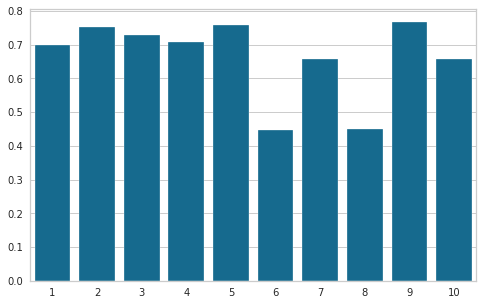

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
plt.show()